In [1]:
# 33/46
# Il peso corporeo e la pressione sistolica del sangue di 26 individui maschi selezionati in modo casuale nella fascia d'età che va da 25 a 30 anni sono mostrati in tabella.
import numpy as np

tabella = np.array ([ [165, 130], [167, 133], [180, 150], [155, 128], [212, 151], [175, 146], [190, 150], [210, 140], [200, 148], [149, 125], [158, 133],
                      [169, 135], [170, 150], [172, 153], [159, 128], [168, 132], [174, 149], [183, 158], [215, 150], [195, 163], [180, 156], [143, 124],
                      [240, 170], [265, 165], [192, 160], [187, 159] ])
n = tabella.size /2 # altrimenti mi torna sia elementi colonna di destra  + elementi colonna sinistra

#Assumiamo che il peso e la pressione sanguigna siano normalmente distribuiti.
# Punto 1) Si determini la retta di regressione
# Punto 2) Si calcolno gli intervalli di confidenza per i coefficenti di regressione.
# Punto 3) Si testi la significatività della regressione usando alpha = 0.05
# Punto 4) Si calcoli il coefficente di determinazione

import matplotlib.pyplot as plt
from scipy.stats import t

Il valore di x_medio è 183.57692307692307
Il valore di x_medio è 145.6153846153846
Il valore di sigma_xy è 269.37573964497045
Il valore di sigma² x è 743.551775147929
I coefficenti della retta di regressione sono b0 = 79.10869188943997 b1 = 0.3622824242351898
 
La retta di regressione è y =  79.11 + 0.36 x


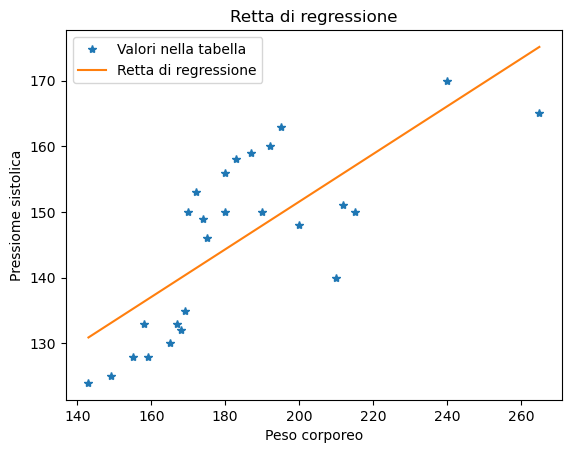

In [2]:
# Punto 1) Si determini la retta di regressione 14/46
x = tabella[:, 0]
y = tabella[:, 1]

x_medio = np.mean(x)
y_medio = np.mean(y)
print("Il valore di x_medio è", x_medio)
print("Il valore di x_medio è", y_medio)

sigma_xy = np.sum((1/n) * ((x - x_medio) * (y - y_medio)))
print ("Il valore di sigma xy è", sigma_xy)

sigma_quadro_x = np.sum((1/n) * ((x - x_medio)**2))
print ("Il valore di sigma²x è", sigma_quadro_x)

b0 = y_medio - ((sigma_xy / sigma_quadro_x) * x_medio)
b1 = (sigma_xy / sigma_quadro_x)

print ("I coefficenti della retta di regressione sono","b0 =", b0, "b1 =", b1)
print (" ")
print ("La retta di regressione è y = ", round(b0, 2), "+", round(b1, 2),"x")

x_graph = np.linspace(min(x), max(x), 1000)
y_graph = b0 + b1 * x_graph

plt.plot (x, y, "*", label = "Valori nella tabella")
plt.plot (x_graph, y_graph, label = "Retta di regressione")
plt.legend ()
plt.title ("Retta di regressione")
plt.xlabel ("Peso corporeo")
plt.ylabel ("Pressiome sistolica")
plt.show ()

76.354 < b0 < 81.864 (attuale valore di b0 = 79.109 )
0.228 < b1 < 0.497 (attuale valore di b1 = 0.362 )


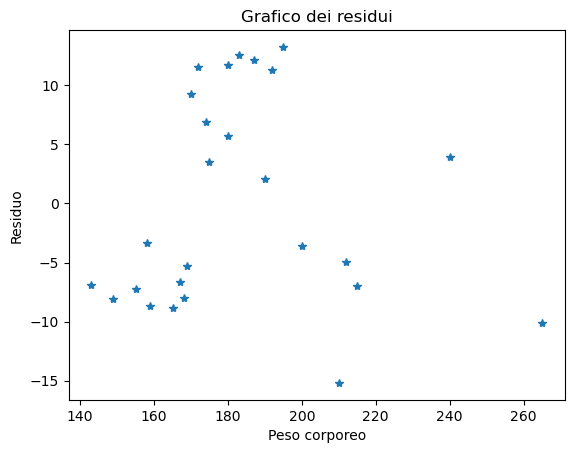

In [3]:
# Punto 2) Si calcolno gli intervalli di confidenza per i coefficenti di regressione.

y_hat = b0 + b1 * x [:]
r = y[:] - y_hat [:] # residui
s = np.sqrt((1/(n-2)) * np.sum((r[:]**2)))

alpha = 0.05 #supponiamo
T = t.ppf (1- alpha/2, n-2)

lim_inf_b0 = b0 - (np.sqrt(((1/n) + ((x_medio **2) / (n * sigma_quadro_x)) ) ) * T)
lim_sup_b0 = b0 + (np.sqrt(((1/n) + ((x_medio **2) / (n * sigma_quadro_x)) ) ) * T)

print (round(lim_inf_b0, 3), "< b0 <", round(lim_sup_b0, 3), "(attuale valore di b0 =", round(b0, 3), ")")

lim_inf_b1 = b1 - (s / (np.sqrt(sigma_quadro_x * n)) * T)
lim_sup_b1 = b1 + (s / (np.sqrt(sigma_quadro_x * n)) * T)

print (round(lim_inf_b1, 3), "< b1 <", round(lim_sup_b1, 3), "(attuale valore di b1 =", round(b1, 3), ")")

plt.plot (x, r, '*')
plt.title ("Grafico dei residui")
plt.xlabel ("Peso corporeo")
plt.ylabel ("Residuo")
plt.show ()

In [4]:
# Punto 3) Si testi la significatività della regressione usando alpha = 0.05

# H0 impossibile poichè ß1 != 0
# rigetto dell'ipotesi H1: ß1 > 0

H1 = np.sqrt(n) * (b1/s) * (np.sqrt(sigma_quadro_x))

if H1 > T:
    print ("L'ipotesi può essere rigettata")
else:
    print ("L'ipotesi non può essere rigettata")

L'ipotesi può essere rigettata


In [5]:
# Punto 4) Si calcoli il coefficente di determinazione

sigma_quadro_r = (1/n) * np.sum((r)**2)
sigma_quadro_y = sigma_quadro_r + (((sigma_xy)**2) /sigma_quadro_x)
print ("sigma²r = ", sigma_quadro_r, "sigma²y = ", sigma_quadro_y)

#coefficiente di determinazione
R_quadro = 1 - (sigma_quadro_r / sigma_quadro_y)
print ("Il coefficiente di determinazione R² = ", R_quadro)

sigma²r =  75.56966732488226 sigma²y =  173.15976331360946
Il coefficiente di determinazione R² =  0.563584138261854
